## 3-3. 한국어 문서에 대한 그래프와 워드 클라우드

한글 워드 클라우드를 그리기 위해 먼저 예제로 사용할 텍스트를 불러온다. KoNLPy는 형태소 분석기도 제공하지만 실습을 위한 말뭉치도 제공하는데, 그중 하나가 대한민국 헌법이다. 아래와 같이 헌법 텍스트를 불러오고 타입과 문자 수 앞 일부분 등을 확인할 수 있는데, 텍스트를 읽어오면 반드시 형태와 내용을 살펴보는 습관을 들이는 것이 좋다.

In [1]:
from konlpy.corpus import kolaw

const_doc = kolaw.open('constitution.txt').read()

print(type(const_doc)) # 가져온 데이터의 type을 확인
print(len(const_doc))
print(const_doc[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


위 결과를 보면 헌법은 총 18,884자로 구성되어 있으며, 가장 앞부분에는 전문이 있고 그 뒤에 제1장 총강으로 시작되는 것을 볼 수 있다. 앞에서 배운 대로 KoNLPy를 임포트해 읽어온 헌법 텍스트에 대해 형태소 분석기를 실시하고, 그 결과를 대략 살펴본다. 이처럼 중간 결과들이 제대로 나왔는지 확인해 보는 것이 나중에 발생할 수 있는 복잡한 오류를 방지할 수 있는 좋은 습관이다.

In [2]:
from konlpy.tag import Okt

t = Okt()
tokens_const = t.morphs(const_doc) # 형태소 단위로 tokenize

print('# 토큰의 수:', len(tokens_const))
print()
print('# 앞 100개의 토큰')
print(tokens_const[:100])

# 토큰의 수: 8796

# 앞 100개의 토큰
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제', '·', '사회', '·']


위 토큰들을 보면 '\n\n'을 비롯한 기호, '3', '1'과 같은 숫자 그리고 '와', '에' 등은 딱히 그 수를 세는 것이 의미가 없어 보인다. 어떤 품사를 선택할지에 대해서는 좀 더 면밀한 분석이 필요하겠지만, 보통 워드 클라우드를 그릴 때에는 명사만 사용하는 것이 일반적이다.

In [3]:
tokens_const = t.nouns(const_doc) # 형태소 단위로 tokenize 후 명사만 추출

print('# 토큰의 수:', len(tokens_const))
print()
print('# 앞 100개의 토큰')
print(tokens_const[:100])

# 토큰의 수: 3882

# 앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


앞선 결과보다는 훨씬 좋아보이나, 명사라고는 해도 '에', '것', '함'과 같은 1자로 된 명사는 의미를 부여하기 어려워보인다. 마지막으로 아래와 같이 결과에서 1자로 된 명사는 삭제하고 결과를 살펴본다.

In [4]:
tokens_const = [token for token in tokens_const if len(token) > 1]

print('# 토큰의 수:', len(tokens_const))
print()
print('# 앞 100개의 토큰')
print(tokens_const[:100])

# 토큰의 수: 3013

# 앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']


이 정도면 어느 정도 만족스럽다고 할 수 있다. 여기서 의미 없는 단어들을 추가로 삭제하고 싶다면, 불용어 사전을 만들어 제거할 수 있다.

이제 영어에 했던 것처럼 수평 막대그래프를 그리는데, 여기서는 먼저 matplotlib에서 사용할 한글 폰트를 아래와 같이 지정해주고 막대그래프를 그리는 부분을 함수화하여 사용한다. 

[('조직', 18), ('국회의원', 18), ('임기', 18), ('직무', 19), ('국무총리', 19), ('자유', 20), ('정부', 20), ('선거', 20), ('임명', 20), ('권리', 21), ('의원', 21), ('사항', 23), ('기타', 26), ('모든', 37), ('헌법', 53), ('국민', 61), ('국회', 68), ('국가', 73), ('대통령', 83), ('법률', 127)]


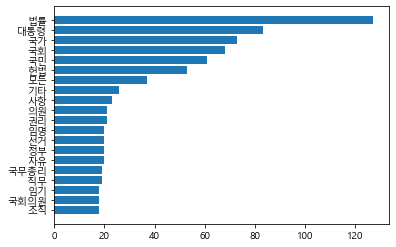

In [5]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # Windows
# font_name = "AppleGothic" # Mac
rc('font', family=font_name)

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1

def word_graph(cnt, max_words=10):
    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])

    plt.barh(range(len(n)), w, tick_label=n)
    # plt.savefig('bar.png') # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(const_cnt, max_words=20)

이제 워드 클라우드를 그려보는데, WordCloud 객체는 별도의 폰트를 사용하므로 아래와 같이 한글 폰트를 지정해서 WordCloud 객체를 생성한다. 먼저 generate() 메서드를 이용해 위에서 사용한 형태소 분석 결과 대신 원문을 넣고 결과를 본다.

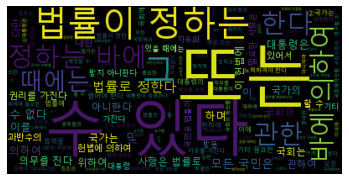

In [6]:
from wordcloud import WordCloud

font_path = "C:/Windows/Fonts/malgun.ttf"
wordcloud = WordCloud(font_path=font_path).generate(const_doc)

plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

역시나 마음에 들지 않는 결과인데, 위 결과를 보면 한글에 대해 별도의 형태소 분석기를 이용해 분석해야 하는 이유를 극명히 보여준다. '또는', '수 있다' 등에는 전혀 관심이 없기 때문이다. 아래 예시에서는 generate_from_frequencies() 메서드와 형태소 분석 결과에 대한 빈도 딕셔너리로 워드 클라우드를 생성한다.

그 외에 WordCloud 객체를 생성할 때 인수를 적절히 활용하면 생성할 워드 클라우드 이미지를 세밀히 조정할 수 있다. 이때 plt.imshow()로 주피터 노트북에 출력하는 이미지는 WordCloud가 생성하는 이미지를 다시 재처리해 보여주므로 지정한 크기가 반영되지 않는다는 점에 주의한다. to_file() 메서드를 사용하면 이미지를 저장할 수 있는데, 저장된 이미지를 불러서 확인하면 크기가 제대로 적용된 것을 확인할 수 있다.

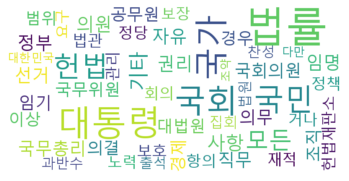

In [7]:
wordcloud = WordCloud(
    font_path=font_path,
    max_font_size=100,
    width=800, # 이미지 너비 지정
    height=400, # 이미지 높이 지정
    background_color='white', # 이미지 배경색 지정
    max_words=50
)

wordcloud.generate_from_frequencies(const_cnt) # 원문이 아닌 형태소 분석 결과로부터 워드 클라우드를 생성

wordcloud.to_file('const.png') # 생성한 이미지를 파일로 저장

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()